In [1]:
from utility_functions.utilities_kie import *
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
from dataset_creator import *

In [3]:
with open('generator_config.json') as f:
    configs = json.load(f)

configs = {key:val for key,val in configs.items() if key not in ("num_files", "clear_all_old_files", "clear_old_files_type", "datasets_init_configs")}
configs['root_dir'] = 'dataset_real'
custom_dataset = Custom_Dataset(**configs)

In [4]:
key_classification_no_re = {
    "hertsteller":["hertsteller"],
    "baujahr":["baujahr"],
    "seiriennummer":["Fabrik_nr", "equipment_nummer"],
    "inventorynummber" : ["anlagenummer"],
    "ort": ["objectstandort", "Straße", "Stadt", "plz","standort", "leistungsort","prüfort"],
    "mangelstatus":["ergebnis_der_prüfung"],
    "wartungsdatum":["leistungsdatum"],   
    "checkup_date":["datum_der_prüfung"],
    "nächste_prüfung":["nächste_prüfung"],
    "servicefirma":["wartungsfirma","ausführende_firma"],
    "contact_person":["durchgeführt_von", "technikers_mängelanzeige"],
    "tragfähigkeit":["tragfähigkeit"],
    "anzahl_haltestellen":["haltstellen_zugangstellen"],
    "Förderhöhe":["förderhöhe"],
    "nenngeschwindigkeit":["geschwindigkeit"],
    "vertrag_wartung":["vertragsnummer", "aufstrags_nummer"]
}

In [5]:
with open('token_ts_no_re.json', 'r') as f:
    labels_no_re = json.load(f)

labels_no_re = key_classification_no_re
labels_no_re_rearranged = rearrange_labels_no_re(labels_no_re=labels_no_re)
labels = {}
labels_no_re_temp = {}
for key, val in labels_no_re.items():
    labels_no_re_temp[f'{key}_key'] = val
    labels_no_re_temp[f'{key}_val'] = []
label2id = {key:i+1 for i, (key,_) in enumerate(labels_no_re_temp.items())}
label2id['Other']=0

id2label = {val:key for key,val in label2id.items()}
id2label

{1: 'hertsteller_key',
 2: 'hertsteller_val',
 3: 'baujahr_key',
 4: 'baujahr_val',
 5: 'seiriennummer_key',
 6: 'seiriennummer_val',
 7: 'inventorynummber_key',
 8: 'inventorynummber_val',
 9: 'ort_key',
 10: 'ort_val',
 11: 'mangelstatus_key',
 12: 'mangelstatus_val',
 13: 'wartungsdatum_key',
 14: 'wartungsdatum_val',
 15: 'checkup_date_key',
 16: 'checkup_date_val',
 17: 'nächste_prüfung_key',
 18: 'nächste_prüfung_val',
 19: 'servicefirma_key',
 20: 'servicefirma_val',
 21: 'contact_person_key',
 22: 'contact_person_val',
 23: 'tragfähigkeit_key',
 24: 'tragfähigkeit_val',
 25: 'anzahl_haltestellen_key',
 26: 'anzahl_haltestellen_val',
 27: 'Förderhöhe_key',
 28: 'Förderhöhe_val',
 29: 'nenngeschwindigkeit_key',
 30: 'nenngeschwindigkeit_val',
 31: 'vertrag_wartung_key',
 32: 'vertrag_wartung_val',
 0: 'Other'}

In [6]:
with open('id2label_no_re.json', 'w') as f:
    json.dump(id2label, f)

with open('label2id_no_re.json', 'w') as f:
    json.dump(label2id, f)

In [7]:
custom_dataset[300]

{'id': 'sample_300',
 'input_ids': [252672,
  1071,
  252646,
  251690,
  253547,
  253560,
  253559,
  254056,
  251568,
  253485,
  251558,
  607,
  22,
  252005,
  252762,
  252673,
  252663,
  253196,
  120,
  106,
  542,
  106,
  253592,
  252678,
  253535,
  18278,
  122,
  250124,
  252194,
  252671,
  252633,
  250025,
  744,
  253481,
  253458,
  251261,
  252651,
  251261,
  251653,
  251445,
  251879,
  251070,
  423,
  251600,
  251572,
  250044,
  250108,
  2358,
  97761,
  250005,
  75,
  253815,
  250037,
  2773,
  251992,
  250376,
  10776,
  250044,
  254054,
  252650,
  252687,
  1936,
  252690,
  250044,
  254057,
  1329,
  1248,
  45285,
  5044,
  250296,
  252668,
  250005,
  552,
  5279,
  254055,
  250044,
  251572,
  250044,
  250108,
  2358,
  97761,
  250005,
  1079,
  252669,
  251952,
  252638,
  252656,
  75,
  253815,
  250037,
  2773,
  74276,
  250074,
  8983,
  4648,
  387,
  253685,
  250044,
  251663,
  251652,
  251621,
  122,
  5044,
  250296,
  252

(2337, 1653, 3)
19
19
11
1
0
0
0
23
3
0
0
0
0
9
0
15
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
32
31
6
5
9
10
16
12
12
20
20
2
2
24
24
4
0
10
10
10
10
10
10
10
10


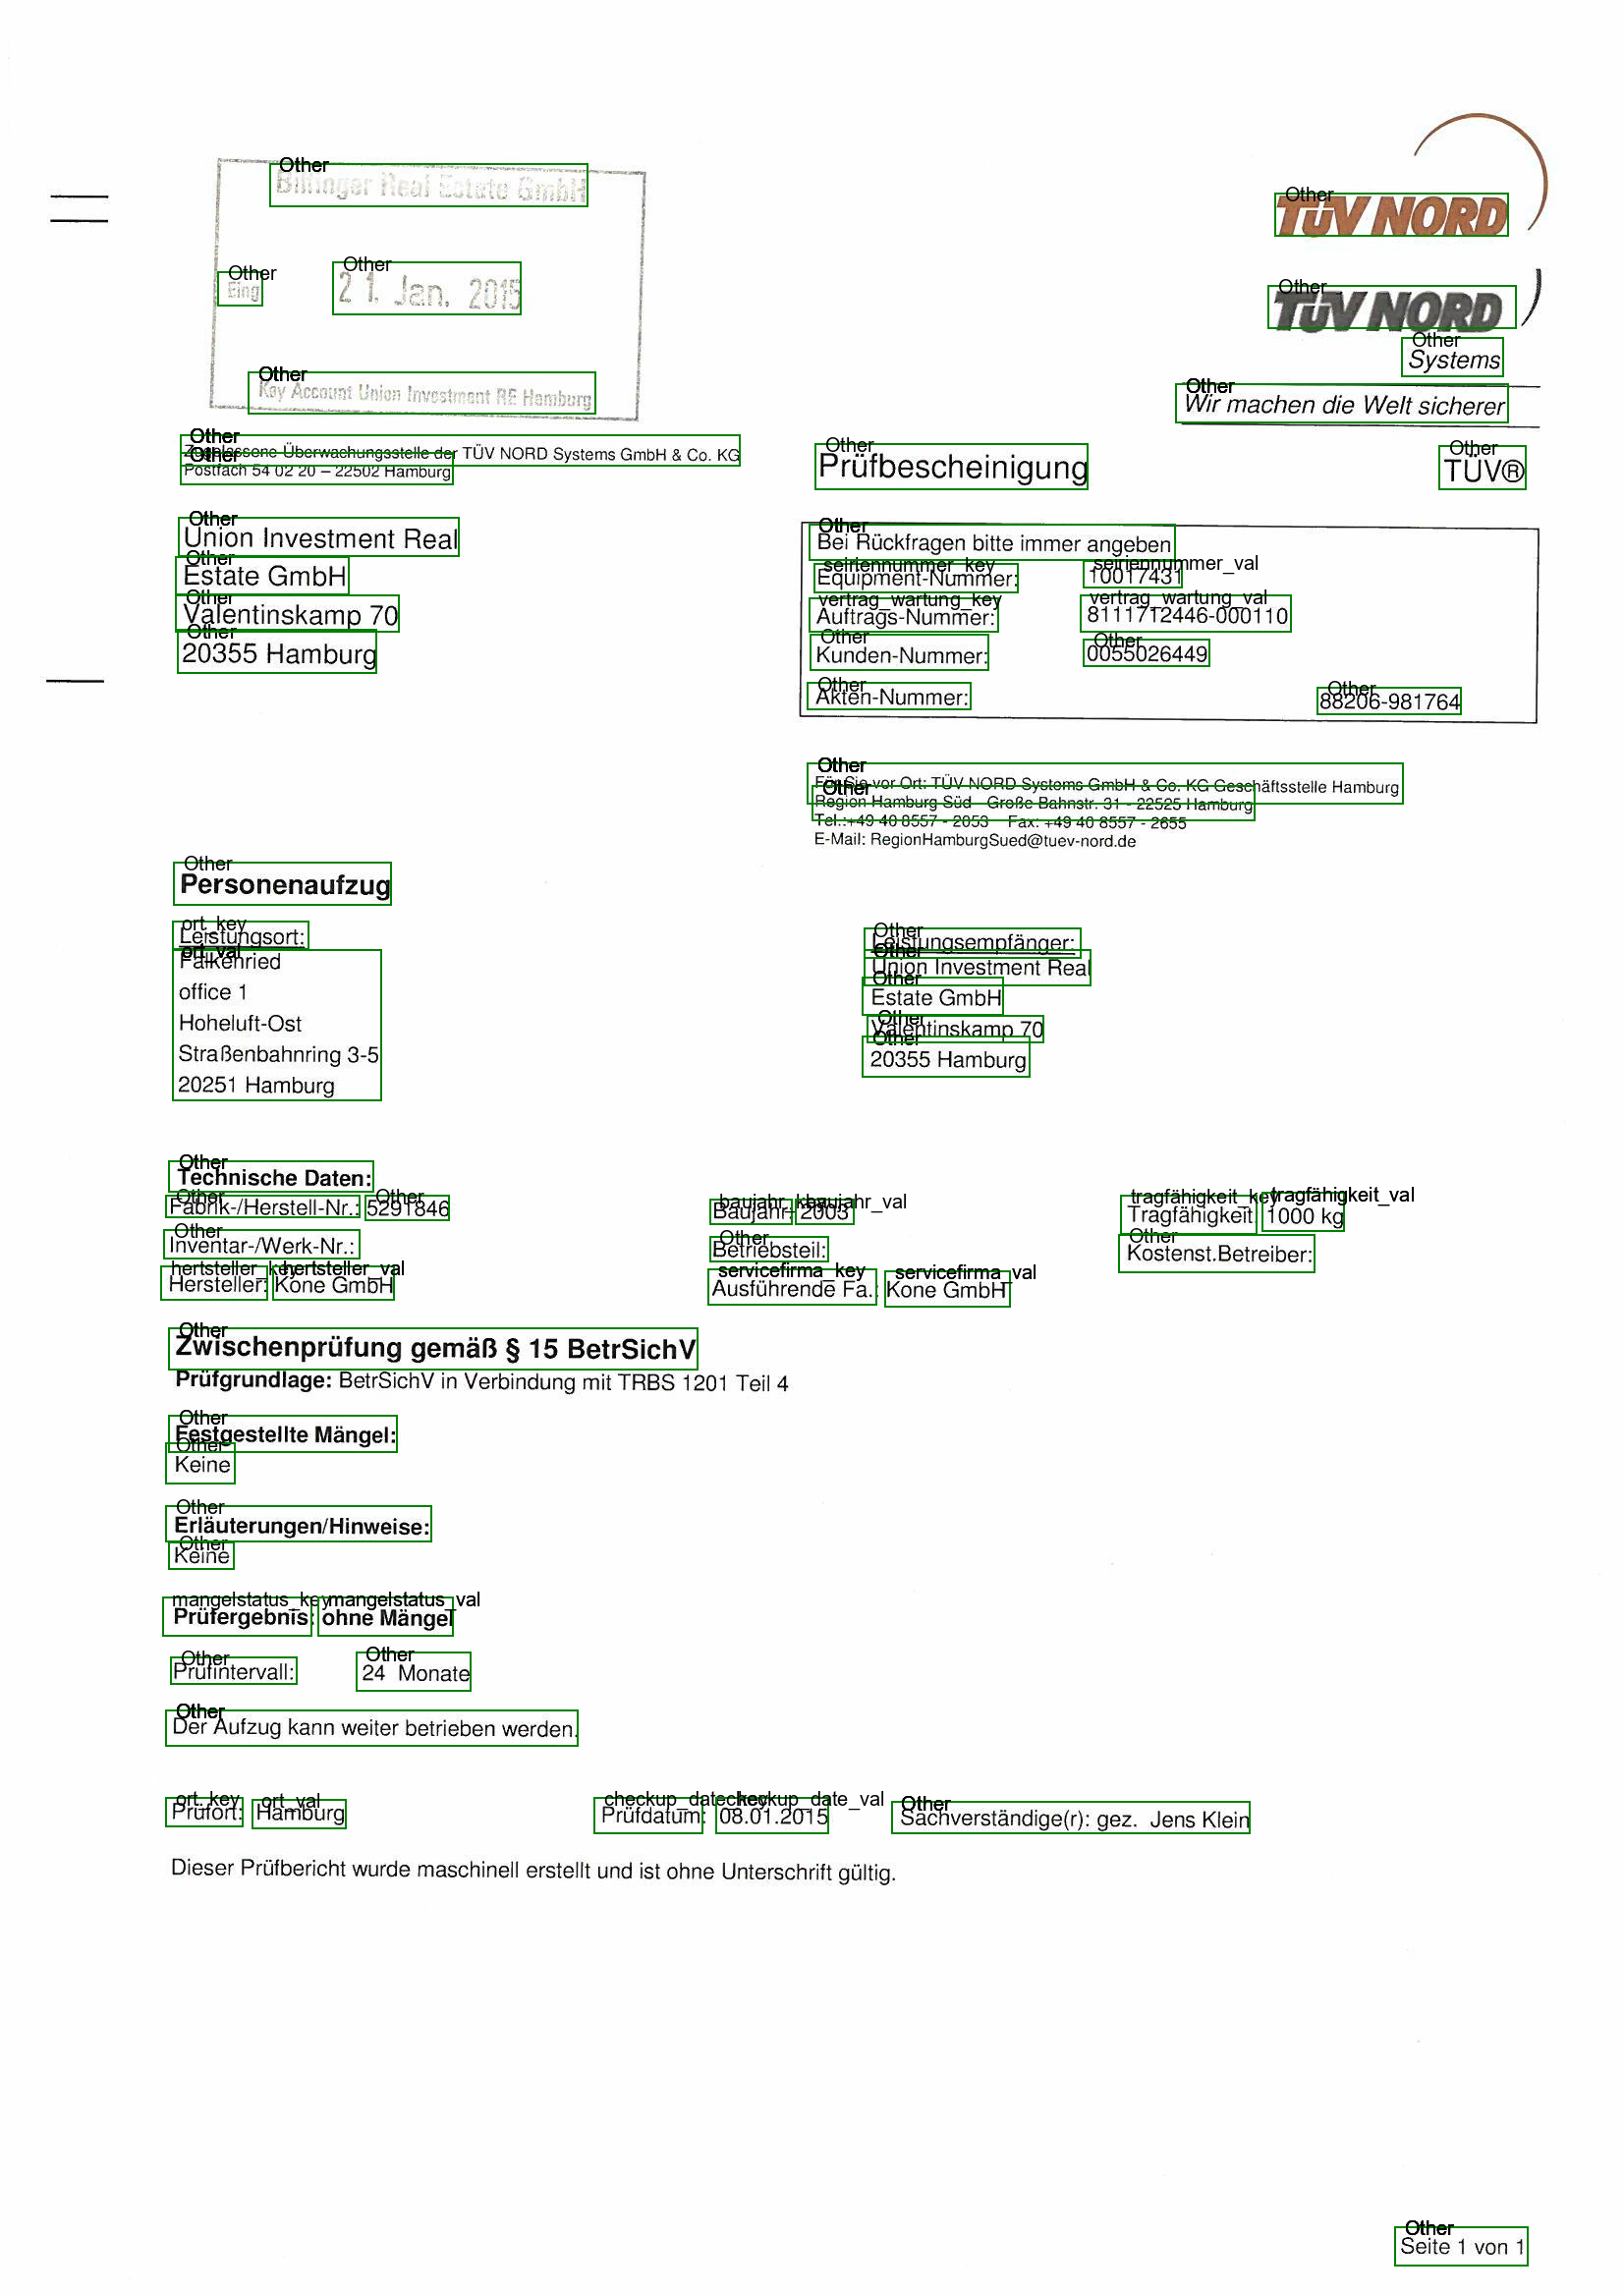

In [9]:
from PIL import ImageDraw, ImageFont

import numpy as np
from PIL import Image

image_to_verify = custom_dataset[300]['original_image']
print(image_to_verify.shape)
#image_to_verify = np.moveaxis(image_to_verify, source=0, destination=-1)
image_to_verify = Image.fromarray(image_to_verify)
image_to_verify

def unnormalize_box(bbox, width, height):
     #x1,y1,x2,y2 = yolobbox2bbox(bbox[0], bbox[1], bbox[2], bbox[3])
     return [
         width * (bbox[0] / 1000),
         height * (bbox[1] / 1000),
         width * (bbox[2] / 1000),
         height * (bbox[3] / 1000),
     ]

font = ImageFont.truetype('template_1/fonts/arial.ttf', size=20)
image = Image.fromarray(custom_dataset[0]['original_image'])
draw = ImageDraw.Draw(image_to_verify)
width, height = image.size

for box, label in zip(custom_dataset[300]['bbox'], custom_dataset[300]['labels']):
    print(label)
    box = unnormalize_box(box, width, height)
    actual_label = id2label[label]
    if actual_label == 'O':
        actual_label = "other"
    elif "question" in actual_label.lower():
        actual_label = "question"
    elif "header" in actual_label.lower():
        actual_label = "header"
    elif "answer" in actual_label.lower():
        actual_label = "answer"
    draw.rectangle(box, width=2, outline='green')
    draw.text((box[0] + 10, box[1] - 10), actual_label, fill='black', font=font)


image_to_verify